In [1]:
from keras import callbacks,optimizers,losses
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

#.py files
import generate_data as generator
import models as model_builder

Using TensorFlow backend.


# Classification

In [2]:
patch_size = 200
batch_size = 256

In [3]:
training_data = generator.generate_patch_data('patches/train',patch_size,patch_size,batch_size,'grayscale')
validation_data = generator.generate_patch_data('patches/validation',patch_size,patch_size,batch_size,'grayscale')

Found 33340 images belonging to 2 classes.
Found 7957 images belonging to 2 classes.


In [4]:
optimizer= optimizers.Adam(learning_rate=5e-5)
loss_function= losses.BinaryCrossentropy()
metrics=['binary_accuracy']
epochs= 100
steps_per_epoch = 50
fit_callbacks = [
    callbacks.EarlyStopping(
        monitor= 'val_accuracy',
        min_delta= 0.01,
        patience= 5, 
        restore_best_weights= True),
    callbacks.CSVLogger(
        filename= 'BCDR Patching Training Parameters',
        separator=",", 
        append=False)
]

In [5]:
model = model_builder.create_patch_model(patch_size,patch_size)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 198, 198, 16)      160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 128)      

In [6]:
trained_model = model_builder.train_model(model,optimizer,loss_function,metrics,epochs,steps_per_epoch,training_data,validation_data,fit_callbacks)

Epoch 1/100
50/50 [==============================] - 1023s 20s/step - loss: 0.9892 - binary_accuracy: 0.5198 - val_loss: 0.7341 - val_binary_accuracy: 0.4930
Epoch 2/100
50/50 [==============================] - 496s 10s/step - loss: 0.7025 - binary_accuracy: 0.5480 - val_loss: 0.7199 - val_binary_accuracy: 0.4933
Epoch 3/100
50/50 [==============================] - 415s 8s/step - loss: 0.6936 - binary_accuracy: 0.5567 - val_loss: 0.7218 - val_binary_accuracy: 0.4929
Epoch 4/100
50/50 [==============================] - 139s 3s/step - loss: 0.6870 - binary_accuracy: 0.5657 - val_loss: 0.7108 - val_binary_accuracy: 0.4954
Epoch 5/100
50/50 [==============================] - 141s 3s/step - loss: 0.6844 - binary_accuracy: 0.5706 - val_loss: 0.7212 - val_binary_accuracy: 0.4972
Epoch 6/100
50/50 [==============================] - 141s 3s/step - loss: 0.6830 - binary_accuracy: 0.5730 - val_loss: 0.7085 - val_binary_accuracy: 0.4997
Epoch 7/100
50/50 [==============================] - 141s 3s/

In [7]:
model.save_weights("model_weights.h5",overwrite=True)
print('Weights saved!')

Weights saved!


In [8]:
t= []
for i in range(len(validation_data)):
    t.append(validation_data[i][1][0:])
g_truth=[]
for i in range(len(t)):
    for n in range(len(t[i])):
        g_truth.append(t[i][n])

In [9]:
yscore= model.predict(validation_data)

In [10]:
y_score=[]
for i in range(len(yscore)):
    y_score.append(yscore[i][0])

In [11]:
predictions = pd.DataFrame({'ground truth':g_truth,'predictions':yscore})

In [15]:
fpr,tpr,_= roc_curve(g_truth,y_score)

In [13]:
print('AUC: ',roc_auc_score(g_truth,y_score))

AUC:  0.5646025679596262


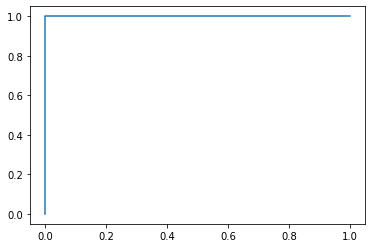

In [16]:
plt.plot(fpr,tpr)